In [1]:
from shapely.geometry import Point, LineString
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import altair as alt
from altair import *
alt.renderers.enable('notebook')
from vega_datasets import data

In [2]:
june_scooters = pd.read_csv('./data/june_trip.csv')
june_scooters.head(2)

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
0,2019-06-01 00:05:46.817000,Bird,BRD3572,PoweredSPI1T,4.0,328.084,2019-06-01 00:00:00,00:02:18.203333,2019-06-01 00:00:00,00:06:16.406666,36.1644,-86.7807,36.1636,-86.7802,"[[36.164679,-86.781089],[36.163693,-86.78011],...",2019-06-02 05:30:19.960000
1,2019-06-01 00:05:46.817000,Bird,BRD3571,Powered2I3MS,5.0,4921.260,2019-06-01 00:00:00,00:02:44.803333,2019-06-01 00:00:00,00:07:28.286666,36.1753,-86.7943,36.1753,-86.7943,"[[36.175367,-86.794232],[36.175367,-86.794232]...",2019-06-02 05:30:19.927000


In [3]:
#trip distance of 1/4 mile which is 1320 feet. 
distance = june_scooters.query('tripDistance >=1320') 
distance.head(2)

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
1,2019-06-01 00:05:46.817000,Bird,BRD3571,Powered2I3MS,5.0,4921.260,2019-06-01 00:00:00,00:02:44.803333,2019-06-01 00:00:00,00:07:28.286666,36.1753,-86.7943,36.1753,-86.7943,"[[36.175367,-86.794232],[36.175367,-86.794232]...",2019-06-02 05:30:19.927000
6,2019-06-01 00:10:46.957000,Bird,BRD3614,Powered1PQQB,6.0,2296.588,2019-06-01 00:00:00,00:06:11.906666,2019-06-01 00:00:00,00:12:34.403333,36.1516,-86.8021,36.1514,-86.8020,"[[36.151438,-86.801898],[36.151184,-86.802086]...",2019-06-02 05:30:20.410000


In [4]:
#time duration of greater than 5 minutes
time = distance.query('5<=tripDuration<=120') 
time.head(2)

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
1,2019-06-01 00:05:46.817000,Bird,BRD3571,Powered2I3MS,5.0,4921.260,2019-06-01 00:00:00,00:02:44.803333,2019-06-01 00:00:00,00:07:28.286666,36.1753,-86.7943,36.1753,-86.7943,"[[36.175367,-86.794232],[36.175367,-86.794232]...",2019-06-02 05:30:19.927000
6,2019-06-01 00:10:46.957000,Bird,BRD3614,Powered1PQQB,6.0,2296.588,2019-06-01 00:00:00,00:06:11.906666,2019-06-01 00:00:00,00:12:34.403333,36.1516,-86.8021,36.1514,-86.8020,"[[36.151438,-86.801898],[36.151184,-86.802086]...",2019-06-02 05:30:20.410000


In [5]:
unique_saturday = time.query('startDate<"2019-06-24" & startDate >= "2019-06-23" & endDate <"2019-06-24"') 
unique_saturday.head(2)

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
160503,2019-06-23 00:06:49.917000,Lyft,LFT9,Powered065897,5.102100,4274.93452,2019-06-23 00:00:00,00:01:43.690000,2019-06-23 00:00:00,00:06:49.816666,36.16932,-86.78850,36.17792,-86.79131,"[[36.16932,-86.7885],[36.16926,-86.78855],[36....",2019-06-24 08:35:08.323000
160522,2019-06-23 00:15:31.330000,Lyft,LFT20,Powered584314,11.084367,6069.55400,2019-06-23 00:00:00,00:04:26.106666,2019-06-23 00:00:00,00:15:31.170000,36.18202,-86.79419,36.17413,-86.78402,"[[36.18202,-86.79419],[36.18199,-86.79411],[36...",2019-06-24 08:35:08.710000


In [6]:
unique_filtered = unique_saturday.query('startTime >= "20:00:00" & endTime <="22:00:00"') 
unique_filtered.head(2)

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
165099,2019-06-23 20:02:27,Gotcha,GOT68,Powered513,15.0,5713.845327,2019-06-23 00:00:00,20:02:29,2019-06-23 00:00:00,20:17:29,36.143769,-86.787450,36.159762,-86.780009,"[[""36.14481"",""-86.78575000000001""],[""36.15972""...",2019-06-24 06:09:55.730000
165119,2019-06-23 20:11:52.273000,SPIN,SPI437,Powered2109036,6.0,1998.031560,2019-06-23 00:00:00,20:05:28,2019-06-23 00:00:00,20:11:23,36.160851,-86.777065,36.155519,-86.775508,"[[36.15562,-86.77533],[36.15551945137512,-86.7...",2019-06-24 09:14:56.423000


In [7]:
nashville = gpd.read_file('./data/MDHA_Promise_Zones/Export_Output_5.shp')
nashville.geometry = nashville.geometry.to_crs(epsg=4326)

In [8]:
def build_LineString(string):
    coord_list = json.loads(string)
    if len(coord_list) <=1:
        return np.NaN
    else:
        try:
            return LineString([Point(float(lng), float(lat)) for lat, lng in coord_list])
        except:
            print(string)
            raise

In [9]:
unique_filtered['geometry'] = unique_filtered.tripRoute.apply(build_LineString)

/Users/teresiamaina/.local/share/virtualenvs/projects-MgIGDI7W/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
unique_filtered=unique_filtered.loc[unique_filtered.geometry.notna()]

In [11]:
unique_geo=gpd.GeoDataFrame(unique_filtered,crs=nashville.crs, geometry=unique_filtered.geometry)

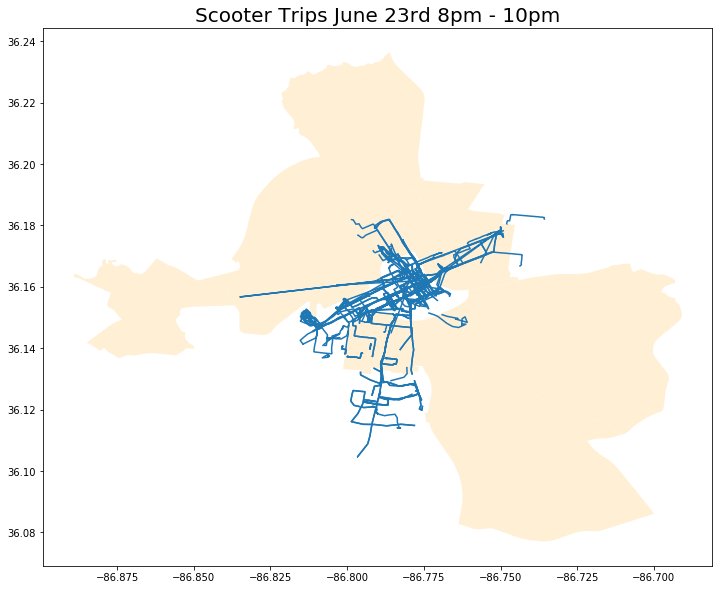

In [13]:
ax = nashville.plot(figsize = (12, 12), color = 'papayawhip')
unique_geo.plot(ax=ax)
plt.title('Scooter Trips June 23rd 8pm - 10pm', fontsize=20)
plt.savefig("June 23rd 8pm")
plt.show();